In [1]:
import os
import re
import glob
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [2]:
target_mCG_df = pd.read_csv("final_filtered.DMRs.tsv", sep="\t")

In [3]:
target_mCG_df.shape

(198807, 72)

In [4]:
target_mCG_df.columns = [re.sub("methylation_level_", "", x) for x in target_mCG_df.columns]

In [5]:
target_mCG_df = target_mCG_df.iloc[:, list(range(6))+[71]+list(range(6,71))]

In [6]:
target_mCG_df

,#chr,start,end,number_of_dms,hypermethylated_samples,hypomethylated_samples,celltype,Ctrl,High,Low,...,Ctrl_Flu_9,Ctrl_HIV_1,Ctrl_HIV_10,Ctrl_HIV_13,Ctrl_HIV_16,Ctrl_HIV_19,Ctrl_HIV_22,Ctrl_HIV_25,Ctrl_HIV_4,Ctrl_HIV_7
0,chr1,665098,665098,1,High,Ctrl,B-Mem,0.500000,1.000000,1.000000,...,0.5,NaN,NaN,NaN,0.750000,0.500000,1.000000,NaN,0.500000,NaN
1,chr1,1097452,1097452,1,NaN,Med,B-Mem,0.969697,0.965517,1.000000,...,1.0,1.000000,1.000000,NaN,0.500000,1.000000,1.000000,NaN,1.000000,NaN
2,chr1,1182938,1182938,1,Ctrl,High,B-Mem,0.292929,0.000000,0.500000,...,0.0,0.500000,0.000000,0.333333,0.000000,0.500000,0.333333,NaN,0.166667,0.000000
3,chr1,1378865,1378865,1,Med,Ctrl,B-Mem,0.112676,0.300000,0.200000,...,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,chr1,1381268,1381294,2,"Low,Med",Ctrl,B-Mem,0.049689,0.318182,0.785714,...,0.0,0.000000,NaN,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198802,chrY,19550160,19550160,1,Low,Ctrl,Th-Naive,0.096774,0.500000,0.833333,...,NaN,0.500000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.250000,0.000000
198803,chrY,20704818,20704818,1,High,Ctrl,Th-Naive,0.200000,1.000000,0.666667,...,NaN,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,1.000000
198804,chrY,26670884,26670884,1,Ctrl,NaN,Th-Naive,0.951823,0.899743,0.914729,...,1.0,0.957746,0.931034,0.937500,0.980392,0.937500,0.970149,1.000000,0.906250,0.900000
198805,chrY,56754144,56754144,1,Ctrl,"High,Low",Th-Naive,0.956020,0.922360,0.902326,...,NaN,0.955645,1.000000,1.000000,0.971751,0.965087,0.963964,0.940476,0.907692,0.950000


In [7]:
target_mCG_df = target_mCG_df.sample(n=100000).reset_index(drop=True)

In [8]:
target_mCG_df.columns

Index(['#chr', 'start', 'end', 'number_of_dms', 'hypermethylated_samples',
       'hypomethylated_samples', 'celltype', 'Ctrl', 'High', 'Low', 'Med',
       'Low_OP_12', 'Low_OP_16', 'Low_OP_25', 'Med_OP_15', 'Med_OP_19',
       'Med_OP_2', 'Med_OP_3', 'Med_OP_5', 'Med_OP_8', 'High_OP_9',
       'High_OP_1', 'High_OP_10', 'High_OP_11', 'High_OP_13', 'High_OP_14',
       'High_OP_17', 'High_OP_18', 'High_OP_20', 'High_OP_21', 'High_OP_22',
       'High_OP_23', 'High_OP_24', 'High_OP_26', 'High_OP_27', 'High_OP_4',
       'High_OP_6', 'High_OP_7', 'Ctrl_Ctrl_1', 'Ctrl_Ctrl_10', 'Ctrl_Ctrl_11',
       'Ctrl_Ctrl_12', 'Ctrl_Ctrl_13', 'Ctrl_Ctrl_14', 'Ctrl_Ctrl_15',
       'Ctrl_Ctrl_2', 'Ctrl_Ctrl_3', 'Ctrl_Ctrl_4', 'Ctrl_Ctrl_5',
       'Ctrl_Ctrl_9', 'Ctrl_Flu_1', 'Ctrl_Flu_11', 'Ctrl_Flu_13',
       'Ctrl_Flu_15', 'Ctrl_Flu_17', 'Ctrl_Flu_19', 'Ctrl_Flu_21',
       'Ctrl_Flu_23', 'Ctrl_Flu_25', 'Ctrl_Flu_3', 'Ctrl_Flu_5', 'Ctrl_Flu_7',
       'Ctrl_Flu_9', 'Ctrl_HIV_1', 'Ctrl_HIV_10', '

In [9]:
sample_data = target_mCG_df

/gale/netapp/DoD/wenliang/bin/miniconda3_4.9.2/envs/echo/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


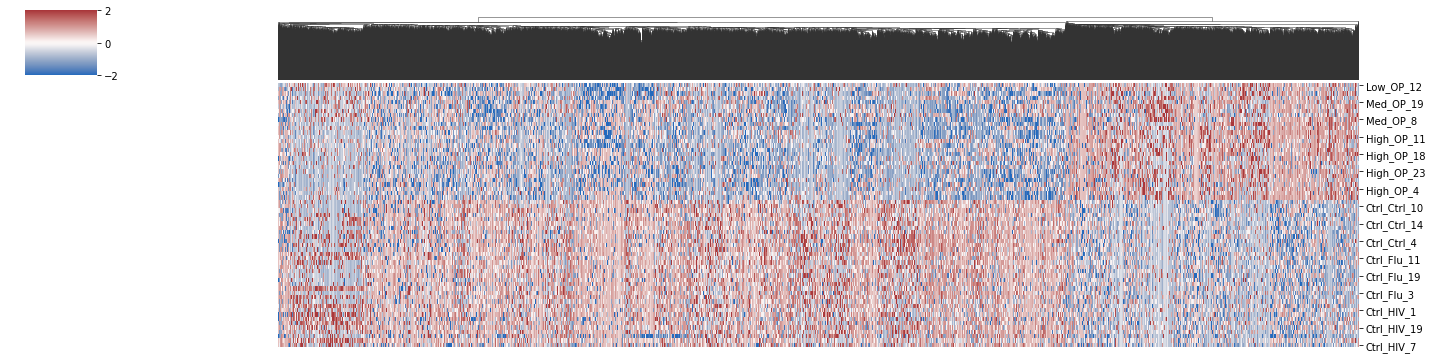

In [10]:
cluster_grid = sns.clustermap(data=sample_data.iloc[:, 11:].astype(float).fillna(0).T, figsize=(20, 5), xticklabels=False, \
                              row_cluster=False, col_cluster=True, z_score=1, cmap='vlag', vmin=-2, vmax=2)

In [11]:
zscore_order = cluster_grid.dendrogram_col.reordered_ind

In [12]:
plot_merge_df = sample_data.iloc[:,11:].T

In [13]:
zscore_df = (plot_merge_df - plot_merge_df.mean())/plot_merge_df.std(ddof=0)

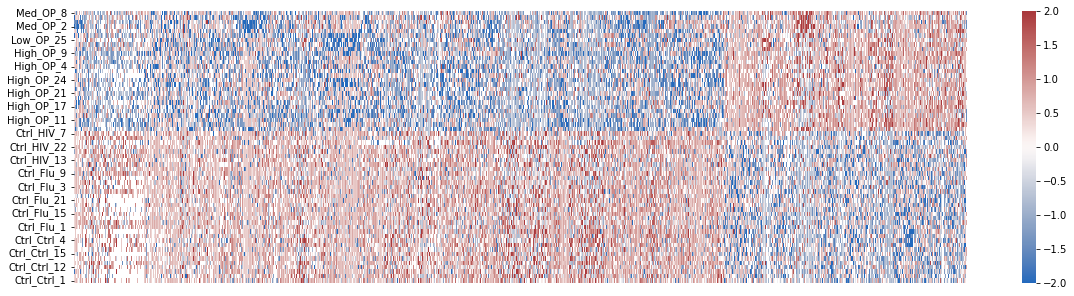

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(zscore_df[zscore_order].astype(float).sort_index(ascending=False), cmap='vlag', ax=ax, \
               xticklabels=False, vmin=-2, vmax=2, rasterized=True)
plt.savefig("OP_DMLs.heatmap.pdf")

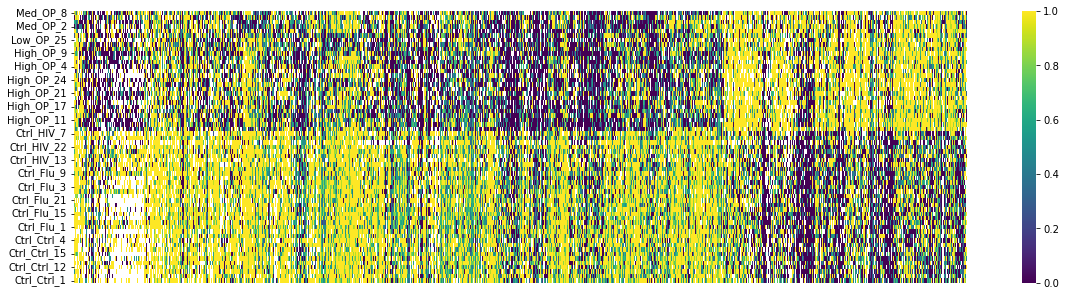

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(plot_merge_df[zscore_order].astype(float).sort_index(ascending=False), cmap='viridis', ax=ax, \
               xticklabels=False, rasterized=True)
plt.savefig("OP_DMLs.mCG.heatmap.pdf")

In [16]:
dmr_corr = target_mCG_df.iloc[:, 11:].corr()


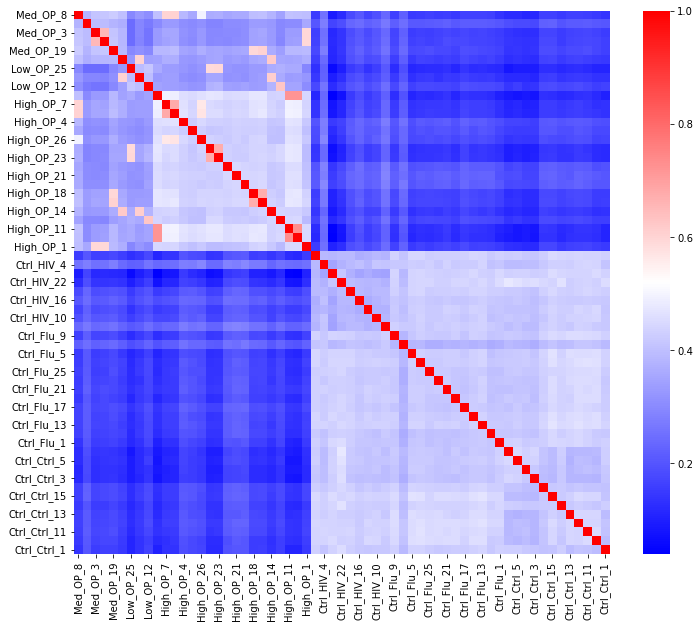

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12, 10))
sns.heatmap(dmr_corr.sort_index(ascending=False).sort_index(ascending=False, axis=1), cmap='bwr')
plt.savefig("OP_DMLs.corr.pdf")